# 필수과제 1

- 캘리포니아 데이터의 다른 변수들을 더 추가하여서 KNN 모델의 성능을 확인해 주시고
- 해당 변수들을 선택한 이유를 논리적으로 정리하셔서, 시각화도 해주시고 
- RMSE 낮추는 K의 최적의 값을 찾아 주시고
- RMSE값을 공유해 주세요!

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


In [226]:
dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MedHouseValue'] = dataset.target # target label 추가
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [227]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

1. MedInc : 중위 소득
2. HouseAge : 건물 연령
3. AveRooms : 평균 방 개수
4. AveBedrms : 평균 침실 개수
5. Population : 인구
6. AveOccup : 
7. Latitude : 경도
8. Longtitude : 위도

The target variable is the median house value for California districts,   
expressed in hundreds of thousands of dollars ($100,000).

In [228]:
df.info() # 데이터의 종합적인 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [229]:
df.isnull().sum() # 결측치 없음

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [230]:
df.duplicated().sum() # 중복 값 없음

0

In [231]:
df.describe() # 기술 통계량 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [232]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

### MedInc 이상치 처리

<Axes: >

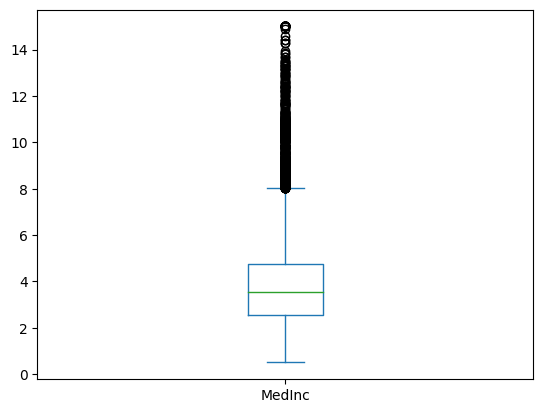

In [233]:
df.MedInc.plot(kind="box")

In [234]:
Q1= df['MedInc'].quantile(0.25)
Q3= df['MedInc'].quantile(0.75)
IQR= Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

((df['MedInc'] < lower_bound) | (df['MedInc'] > upper_bound)).sum()

681

In [235]:
df = df[(df['MedInc'] >= lower_bound) & (df['MedInc'] <= upper_bound)]

### MedHouseValue 이상치 처리

<Axes: >

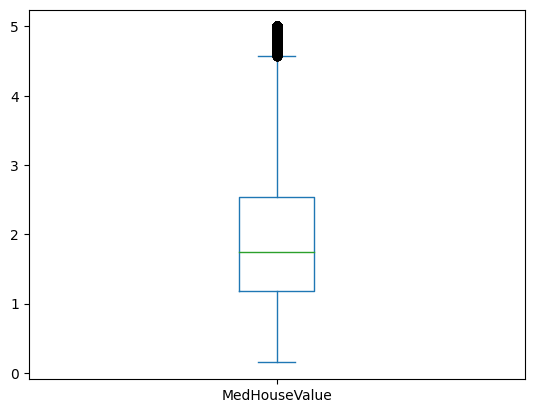

In [236]:
df.MedHouseValue.plot(kind="box")

In [237]:
Q1= df['MedHouseValue'].quantile(0.25)
Q3= df['MedHouseValue'].quantile(0.75)
IQR= Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

((df['MedHouseValue'] < lower_bound) | (df['MedHouseValue'] > upper_bound)).sum()

722

In [238]:
df = df[(df['MedHouseValue'] >= lower_bound) & (df['MedHouseValue'] <= upper_bound)]

### 표준화 

In [214]:
mean_df = df.mean()
mean_df

MedInc              3.593210
HouseAge           28.405261
AveRooms            5.329272
AveBedrms           1.097652
Population       1444.537038
AveOccup            3.039550
Latitude           35.660576
Longitude        -119.563723
MedHouseValue       1.870531
dtype: float64

In [215]:
std_df = df.std()
std_df

MedInc              1.443046
HouseAge           12.467609
AveRooms            2.290850
AveBedrms           0.455918
Population       1143.234707
AveOccup            5.969357
Latitude            2.154638
Longitude           2.006209
MedHouseValue       0.912581
dtype: float64

In [216]:
df_standardized = df.sub(mean_df, axis=1).div(std_df, axis=1)
df_standardized

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
2,2.539206,1.892483,1.291601,-0.053092,-0.829696,-0.039751,1.016144,-1.333997,1.808572
3,1.420530,1.892483,0.213056,-0.053941,-0.775464,-0.082355,1.016144,-1.338982,1.690226
4,0.175317,1.892483,0.415820,-0.036346,-0.769341,-0.143748,1.016144,-1.338982,1.700089
5,0.307399,1.892483,-0.247774,0.013105,-0.902297,-0.150712,1.016144,-1.338982,0.905639
6,0.045660,1.892483,-0.173457,-0.320870,-0.306619,-0.152637,1.011503,-1.338982,1.228898
...,...,...,...,...,...,...,...,...,...
20635,-1.408763,-0.273129,-0.123892,0.078263,-0.524422,-0.080234,1.772652,-0.760777,-1.193900
20636,-0.718210,-0.834583,0.342564,0.478458,-0.952155,0.013947,1.777293,-0.820591,-1.204858
20637,-1.311954,-0.914791,-0.054010,0.049220,-0.382718,-0.119597,1.749446,-0.825575,-1.038298
20638,-1.196088,-0.834583,0.000105,0.162898,-0.615392,-0.153507,1.749446,-0.875421,-1.121578


### 정규화 

In [217]:
max_df = df_standardized.max()
max_df

MedInc            3.061643
HouseAge          1.892483
AveRooms         55.527007
AveBedrms        72.313539
Population       29.947886
AveOccup         99.956285
Latitude          2.919016
Longitude         2.618732
MedHouseValue     2.960250
dtype: float64

In [218]:
min_df = df_standardized.min()
min_df

MedInc          -2.143598
HouseAge        -2.198117
AveRooms        -1.956967
AveBedrms       -1.676440
Population      -1.260928
AveOccup        -0.393215
Latitude        -1.448307
Longitude       -2.385732
MedHouseValue   -1.885356
dtype: float64

In [219]:
df_normalized = df_standardized.sub(min_df, axis=1).div(max_df - min_df, axis=1)
df_normalized

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
2,0.899633,1.000000,0.056513,0.021940,0.013818,0.003522,0.564293,0.210159,0.762325
3,0.684719,1.000000,0.037750,0.021929,0.015555,0.003098,0.564293,0.209163,0.737902
4,0.445496,1.000000,0.041277,0.022166,0.015752,0.002486,0.564293,0.209163,0.739937
5,0.470871,1.000000,0.029733,0.022835,0.011491,0.002417,0.564293,0.209163,0.575985
6,0.420587,1.000000,0.031026,0.018321,0.030578,0.002397,0.563231,0.209163,0.642696
...,...,...,...,...,...,...,...,...,...
20635,0.141172,0.470588,0.031888,0.023715,0.023599,0.003119,0.737513,0.324701,0.142698
20636,0.273837,0.333333,0.040003,0.029124,0.009894,0.004057,0.738576,0.312749,0.140436
20637,0.159770,0.313725,0.033104,0.023323,0.028140,0.002727,0.732200,0.311753,0.174810
20638,0.182030,0.333333,0.034046,0.024859,0.020684,0.002389,0.732200,0.301793,0.157623


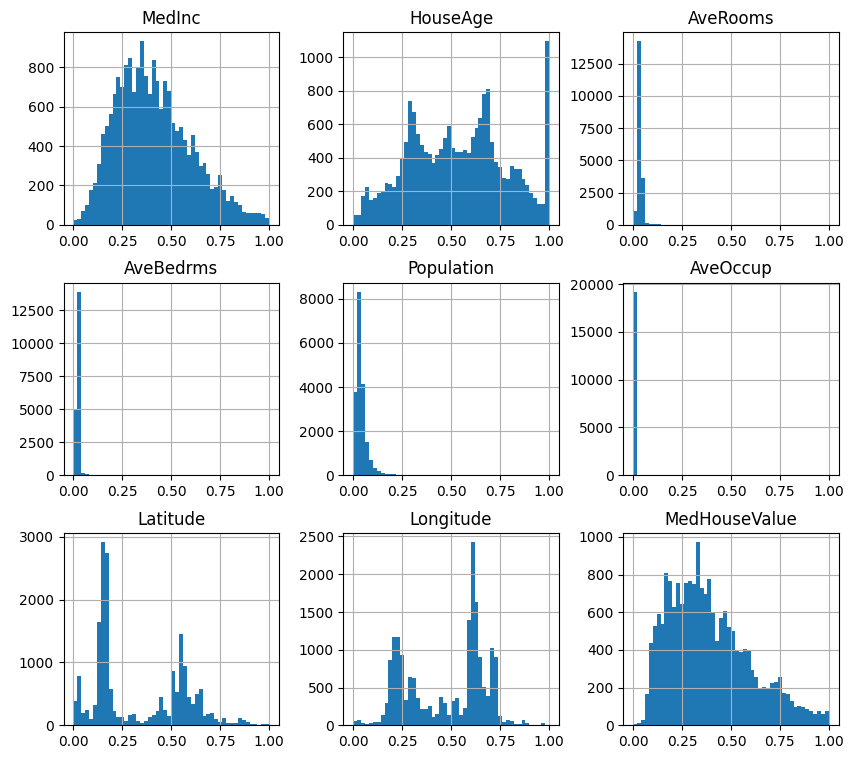

In [220]:
df_normalized.hist(bins=50, figsize=(10, 9))
plt.show()

### 로그 변환 

In [22]:
df = df_normalized.apply(lambda x: np.log(x + 1))
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
2,0.641660,0.693147,0.054973,0.021703,0.013723,0.003516,0.447434,0.190752,0.566634
3,0.521599,0.693147,0.037055,0.021692,0.015436,0.003093,0.447434,0.189929,0.552679
4,0.368453,0.693147,0.040448,0.021924,0.015629,0.002483,0.447434,0.189929,0.553849
5,0.385855,0.693147,0.029300,0.022578,0.011426,0.002414,0.447434,0.189929,0.454880
6,0.351070,0.693147,0.030555,0.018155,0.030120,0.002395,0.446755,0.189929,0.496339
...,...,...,...,...,...,...,...,...,...
20635,0.132056,0.385662,0.031391,0.023439,0.023325,0.003114,0.552455,0.281187,0.133392
20636,0.242034,0.287682,0.039224,0.028708,0.009845,0.004049,0.553066,0.272123,0.131411
20637,0.148222,0.272867,0.032568,0.023055,0.027751,0.002723,0.549392,0.271364,0.161106
20638,0.167233,0.287682,0.033479,0.024555,0.020473,0.002386,0.549392,0.263742,0.146369


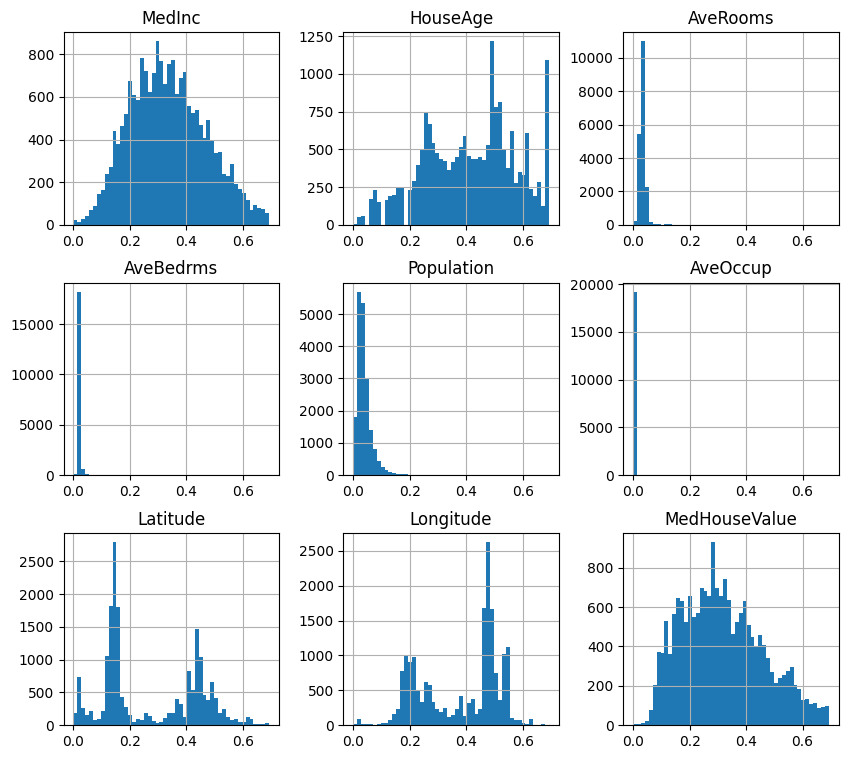

In [23]:
df.hist(bins=50, figsize=(10, 9))
plt.show()

### 상관 계수 

In [150]:
df.corr(numeric_only=True)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
MedInc,1.000000,-0.193746,0.306471,-0.066181,0.055018,0.003853,-0.074564,-0.015528,0.626323
HouseAge,-0.193746,1.000000,-0.175362,-0.085377,-0.296166,0.013901,0.002571,-0.099297,0.072698
AveRooms,0.306471,-0.175362,1.000000,0.851507,-0.068897,0.000624,0.126768,-0.032374,0.087534
AveBedrms,-0.066181,-0.085377,0.851507,1.000000,-0.069963,-0.005713,0.074011,0.012959,-0.060768
Population,0.055018,-0.296166,-0.068897,-0.069963,1.000000,0.070346,-0.115817,0.103033,0.021836
AveOccup,0.003853,0.013901,0.000624,-0.005713,0.070346,1.000000,-0.009951,0.017009,-0.031382
Latitude,-0.074564,0.002571,0.126768,0.074011,-0.115817,-0.009951,1.000000,-0.923585,-0.150408
Longitude,-0.015528,-0.099297,-0.032374,0.012959,0.103033,0.017009,-0.923585,1.000000,-0.050733
MedHouseValue,0.626323,0.072698,0.087534,-0.060768,0.021836,-0.031382,-0.150408,-0.050733,1.000000


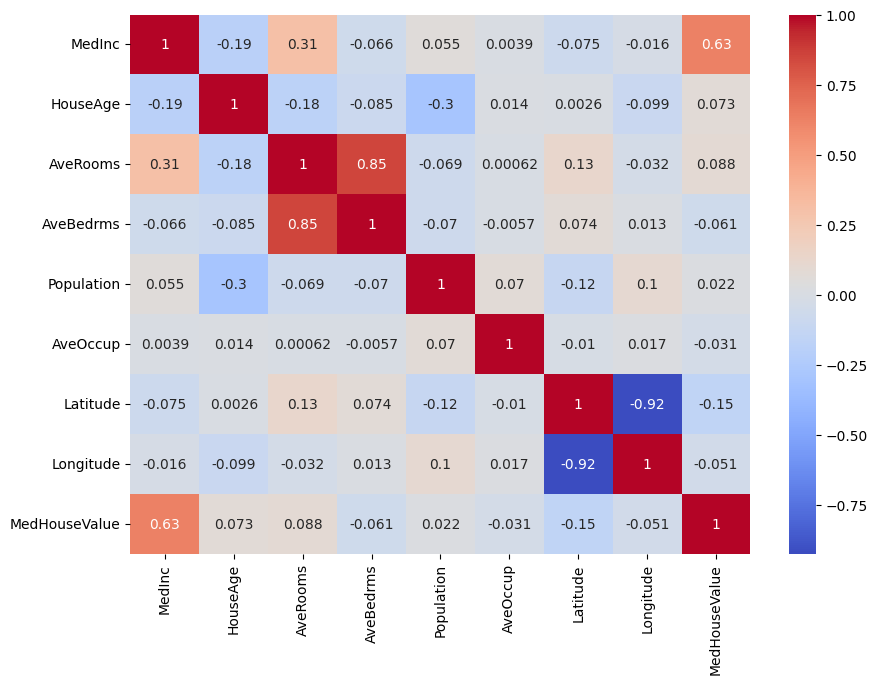

In [151]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

## 모델 학습 

In [253]:
# 레이블 데이터 분리
data = df.drop(['MedHouseValue'], axis=1) # 'Latitude', "Longitude"를 제외하면 성능이 더 떨어진다
label = df.MedHouseValue

In [254]:
X_train,  X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

In [255]:
# 모델과 하이퍼 파라미터 설정
model = KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=11, weights='distance')

# 훈련 데이터로 모델 학습
model.fit(X_train, y_train) 

# 학습이 된 모델을 통해 테스트 데이터를 바탕으로 예측
y_pred = model.predict(X_test)

#y_pred = np.exp(y_pred)

# 예측값과 실제값 사이의 오차로 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

RMSE:  0.8220471044562698


In [244]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor()
model.fit(X_train, y_train)

# 그리드 서치(Grid Search)로 최적의 하이퍼 파라미터를 찾아 성능을 개선
param_grid={
    'n_neighbors': [x for x in range(1, 150, 5)],  # 이웃의 개수 후보값
    'weights': ['uniform', 'distance'],  # 가중치 옵션 후보값
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],  # 알고리즘 옵션 후보값
    'metric': ['euclidean', 'manhattan']  # 거리 측정 방법 후보값
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, refit=True) # 교차검증 5회(cv), refit: 최적의 하이퍼파라미터 조합으로 재학습

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

print(grid_search.best_params_) # 선택된 최적의 파라미터를 출력
y_pred = model.predict(X_test)  # 재학습된 모델을 토대로 예측

rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #RMSE 출력
print("RMSE: ", rmse)  

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
RMSE:  0.8220471044562698
